In [25]:
from qiskit import *
from qiskit.visualization import *

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt
import math

sim = Aer.get_backend('qasm_simulator')

# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

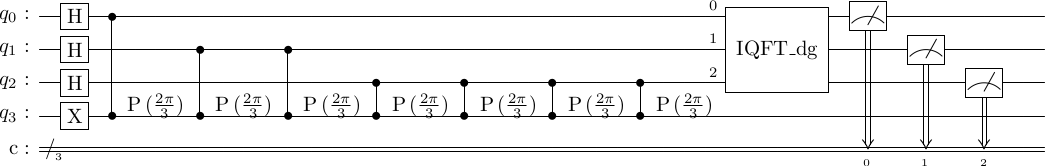

In [26]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

In [27]:
print(qpe2.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{3} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \multigate{2}{\mathrm{IQFT\_dg}}_<<<{0} & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw & \ctrl{2} & \qw & \qw & \qw & \ctrl{2} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ghost{\mathrm{IQFT\_dg}}_<<<{1} & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathrm{\frac{2\pi}{3}})} \qw & \qw & \qw & \qw & \dstick{\hspace{2.0em}\mathrm{P}\,(\mathr

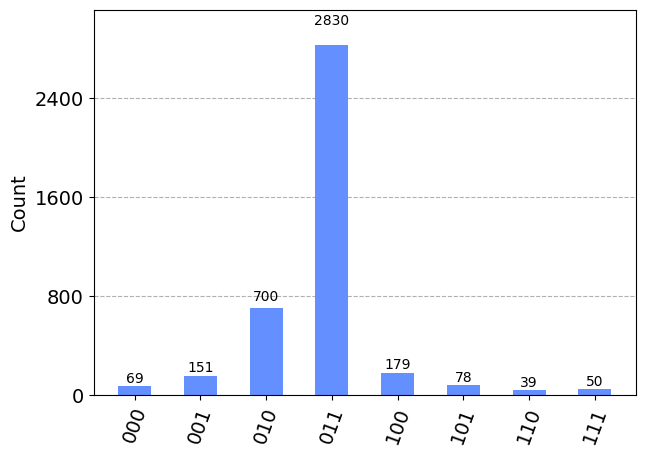

In [28]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

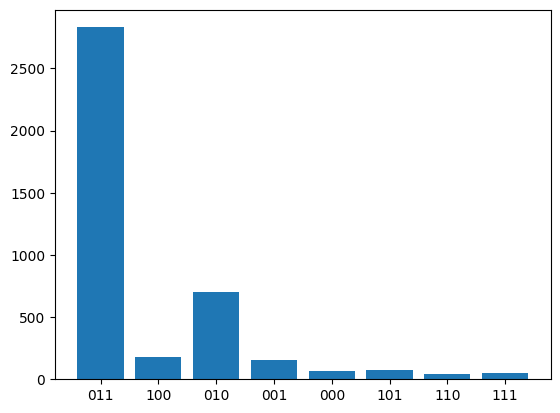

In [29]:
plt.bar(answer.keys(), answer.values())
save_fig('qpe13s3')

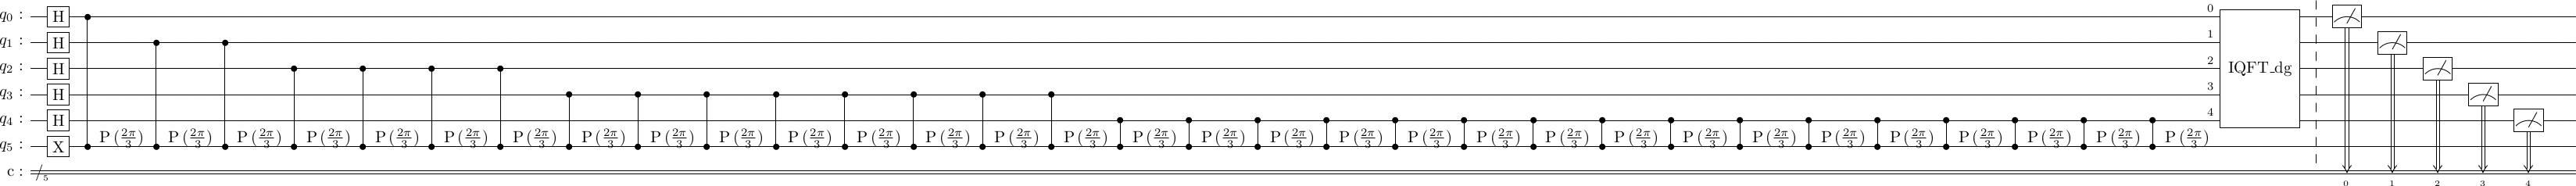

In [30]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

In [31]:
print(qpe3.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{5} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \multigate{4}{\

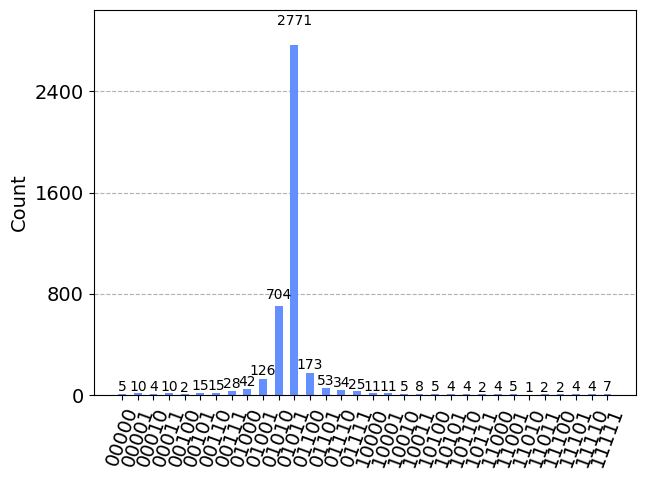

In [32]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

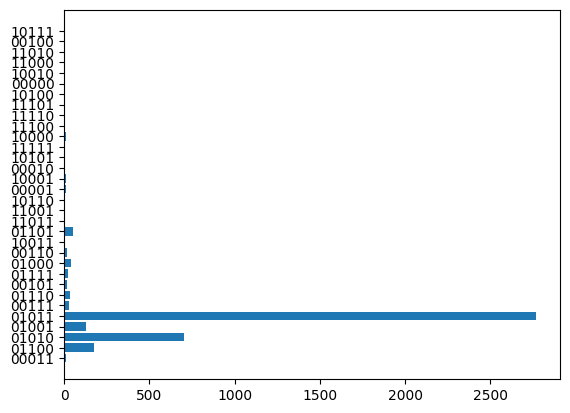

In [33]:
plt.barh(list(answer.keys()), answer.values())
save_fig('qpe13s5')